<a href="https://colab.research.google.com/github/jpelson/heatsensitivityexposureindexdc/blob/main/Elson_688Y_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# # Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import packages
import os
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.patches import Circle


# Set the working directory
os.chdir('/content/drive/MyDrive/School/UMD Classes/Colab Notebooks/exercise10')

In [4]:
heat = gpd.read_file('Heat_Sensitivity_Exposure_Index/Heat_Sensitivity_Exposure_Index.shp')
# https://opendata.dc.gov/datasets/DCGIS::heat-sensitivity-exposure-index/about

In [5]:
# Rename column NAME to Census Tract
heat = heat.rename(columns={'NAME': 'Census Tract'})

# make the data readable
heat['Census Tract'] = heat['Census Tract'].str.split(',', expand=True)[0]

# Extract only the numeric part (assuming the format is consistent)
def remove_census_tract(text):
  if pd.isna(text):  # Handle missing values (optional)
    return text
  return text.split()[-1]  # Split by space and take the last element

  # Apply the function to the column
heat['Census Tract'] = heat['Census Tract'].apply(remove_census_tract)

In [6]:
################## HSI ########################

In [8]:
## what wards are the most sensitive to heat ##

# sort data by HSI
heat = heat.sort_values(by='HSI', ascending=False)

# filter out rows with outlier value
filtered_HEAT = heat[heat['HSI'] != -9999.0]

# show all data
pd.set_option('display.max_rows', 999)

# show results
print('Census Tracts by Heat Sensitivity')
print(filtered_HEAT.loc[:, ['Census Tract', 'HSI']])

Census Tracts by Heat Sensitivity
    Census Tract       HSI
182        74.01  0.659620
154        77.08  0.652722
201        98.01  0.650947
202        98.02  0.641463
186        75.04  0.586688
171        77.07  0.580597
189        75.02  0.579645
192        74.08  0.574572
185        76.05  0.569402
152        99.06  0.562376
195        74.09  0.556783
135        78.03  0.551087
191        74.06  0.550403
12         20.01  0.546308
116        96.02  0.542193
179           64  0.540842
5          18.04  0.539659
170        77.09  0.537367
155        99.04  0.534300
200           97  0.531043
196        73.04  0.528725
160        99.05  0.524452
184        75.03  0.522519
199        98.07  0.519280
153        77.03  0.516782
205          109  0.515108
149        96.03  0.508940
204        98.11  0.505179
90         96.01  0.503598
177        76.01  0.502842
148        78.08  0.498924
187        76.03  0.498398
76         92.04  0.496944
137        78.04  0.494922
198        98.03  0.4

In [9]:
## what are 10 tracts that are most and least likely to be sensitive to heat ##
# sort data by HSI
sorted_filtered_HSI_HEAT = filtered_HEAT.sort_values(by='HSI',ascending=False)

#show top 10 and bottom 10
print("Census Tracts Most Sensitive to Heat")
print(sorted_filtered_HSI_HEAT[['Census Tract', 'HSI']].head(10))

print("Census Tracts Least Sensitive to Heat")
print(sorted_filtered_HSI_HEAT[['Census Tract', 'HSI']].tail(10))

Census Tracts Most Sensitive to Heat
    Census Tract       HSI
182        74.01  0.659620
154        77.08  0.652722
201        98.01  0.650947
202        98.02  0.641463
186        75.04  0.586688
171        77.07  0.580597
189        75.02  0.579645
192        74.08  0.574572
185        76.05  0.569402
152        99.06  0.562376
Census Tracts Least Sensitive to Heat
    Census Tract       HSI
80         40.02  0.115960
54          5.01  0.114204
96         42.02  0.113293
123       106.03  0.112553
105        53.03  0.112214
64         39.02  0.107157
101        52.02  0.104525
78         40.01  0.099995
172        72.02  0.067729
178        72.01  0.063413


In [10]:
## calculate median ##
median_sorted_filtered_HSI = sorted_filtered_HSI_HEAT['HSI'].median()

print("The median HSI is", median_sorted_filtered_HSI)

The median HSI is 0.27894449


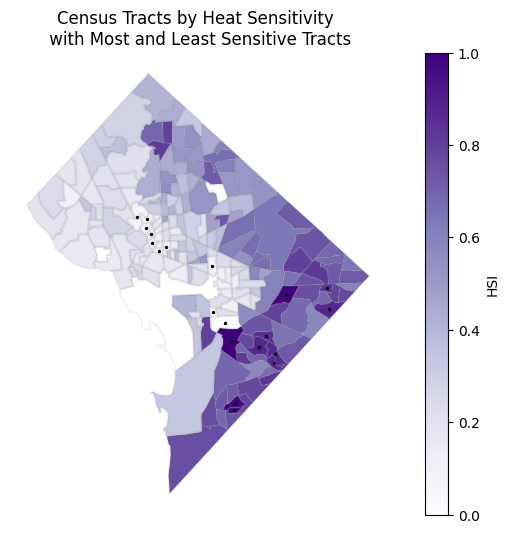

In [11]:
## map all HSI ###

# Get top 10 and bottom 10 HSI tracts
top_10_HSI_tracts = sorted_filtered_HSI_HEAT.iloc[:10, :]
bottom_10_HSI_tracts = sorted_filtered_HSI_HEAT.iloc[-10:, :]

# combine to map
focused_HSI_tracts = pd.concat([top_10_HSI_tracts,bottom_10_HSI_tracts])

# reposition crs
filtered_HEAT = filtered_HEAT.to_crs(epsg=26917)
heat = heat.to_crs(epsg=26917)
focused_HSI_tracts = focused_HSI_tracts.to_crs(epsg=26917)

#plot the results of HSI per census tract
fig, ax = plt.subplots(figsize=(10, 6))
filtered_HEAT.plot(column='HSI', ax=ax, cmap='Purples')
focused_HSI_tracts.centroid.plot(ax=ax, marker='o', markersize=2, color='black')
heat.boundary.plot(ax=ax, color="grey", alpha=0.1, label="TRACT")

# Create a colorbar
sm = ScalarMappable(cmap='Purples')
sm.set_array([])
plt.colorbar(sm, label='HSI', orientation='vertical', ax=ax)

# plot the data
plt.title('Census Tracts by Heat Sensitivity \n with Most and Least Sensitive Tracts')
ax.axis('off')
plt.show()

In [ ]:
###################### HEI ######################

In [12]:
## what wards are the most exposed to heat ##

# sort data by HSI
heat = heat.sort_values(by='HEI', ascending=False)

# show results
print(heat.loc[:, ['Census Tract', 'HEI']])

    Census Tract       HEI
130        58.02  0.853906
95         33.02  0.836997
58         28.02  0.828263
84         44.01  0.827416
136           59  0.823675
49            31  0.815363
123       106.03  0.814482
94         44.02  0.812295
132        47.02  0.809556
71            36  0.808039
62            30  0.801561
25         95.09  0.790840
55         92.01  0.786232
134        58.01  0.782542
113          107  0.782319
46         28.01  0.779987
88         87.01  0.779615
76         92.04  0.776715
97         48.01  0.769578
133          108  0.765376
124        47.03  0.764842
98            46  0.763324
34         95.04  0.763061
48            29  0.762168
93         88.03  0.758312
9          19.01  0.758236
82         87.02  0.757524
68            35  0.757407
107       106.01  0.755432
122          101  0.755304
120        47.04  0.754196
144        79.03  0.753930
140        83.01  0.752565
73         37.02  0.752512
96         42.02  0.752414
65            34  0.751725
1

In [13]:
## what are 10 tracts that are most and least likely to be exposed to heat ##
# sort data by HEI
sorted_filtered_HEI_HEAT = heat.sort_values(by='HEI', ascending=False)

#show top 10 and bottom 10
print("Census Tracts Most Exposed to Heat")
print(sorted_filtered_HEI_HEAT[['Census Tract', 'HEI']].head(10))

print("Census Tracts Least Exposed to Heat")
print(sorted_filtered_HEI_HEAT[['Census Tract', 'HEI']].tail(10))

Census Tracts Most Exposed to Heat
    Census Tract       HEI
130        58.02  0.853906
95         33.02  0.836997
58         28.02  0.828263
84         44.01  0.827416
136           59  0.823675
49            31  0.815363
123       106.03  0.814482
94         44.02  0.812295
132        47.02  0.809556
71            36  0.808039
Census Tracts Least Exposed to Heat
   Census Tract       HEI
0            16  0.239497
29        13.03  0.232785
51         8.04  0.212044
28         9.04  0.211959
86         8.02  0.201398
4         18.03  0.187732
43         9.02  0.169229
18           26  0.164195
1            15  0.072545
13        13.01  0.051709


In [14]:
## calculate median
median_sorted_filtered_HEI = sorted_filtered_HEI_HEAT['HEI'].median()

print("The median HEI is", median_sorted_filtered_HEI)


The median HEI is 0.6156554249999999


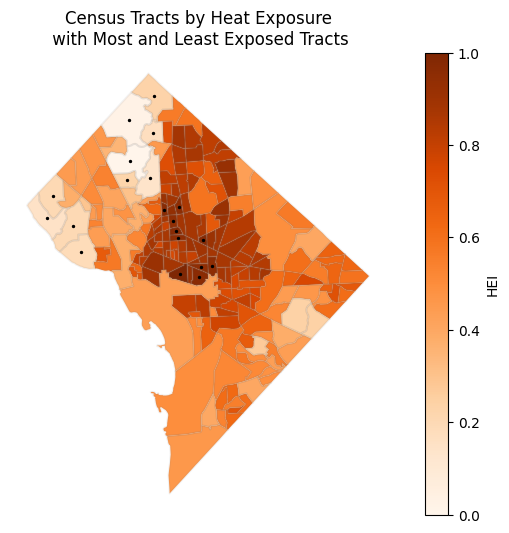

In [15]:
## map all HEI ###

# Get top 10 and bottom 10 HSI tracts
top_10_HEI_tracts = sorted_filtered_HEI_HEAT.iloc[:10, :]
bottom_10_HEI_tracts = sorted_filtered_HEI_HEAT.iloc[-10:, :]

# combine to map
focused_HEI_tracts = pd.concat([top_10_HEI_tracts,bottom_10_HEI_tracts])

# reposition crs
filtered_HEAT = filtered_HEAT.to_crs(epsg=26917)
heat = heat.to_crs(epsg=26917)
focused_HEI_tracts = focused_HEI_tracts.to_crs(epsg=26917)

#plot the results of HEI per census tract
fig, ax = plt.subplots(figsize=(10, 6))
heat.plot(column='HEI', ax=ax, cmap='Oranges')
focused_HEI_tracts.centroid.plot(ax=ax, marker='o', markersize=2, color='black')
heat.boundary.plot(ax=ax, color="grey", alpha=0.1, label="TRACT")

# Create a colorbar, specifying the axes
sm = ScalarMappable(cmap='Oranges')
sm.set_array([])
plt.colorbar(sm, label='HEI', orientation='vertical', ax=ax)

plt.title('Census Tracts by Heat Exposure\n with Most and Least Exposed Tracts')
ax.axis('off')
plt.show()

In [ ]:
##################### HSEI #######################

In [16]:
## what wards are both sensitive and exposed to heat

# sort data by HSEI
filtered_HEAT = heat.sort_values(by='HSEI', ascending=False)

# filter out rows with outlier value
filtered_HEAT = heat[heat['HSI'] != -9999.0]

# show results
print(filtered_HEAT.loc[:, ['Census Tract', 'HSEI']])

    Census Tract      HSEI
130        58.02  0.498636
95         33.02  0.529493
58         28.02  0.557926
84         44.01  0.492747
136           59  0.507981
49            31  0.525076
123       106.03  0.463518
94         44.02  0.503470
132        47.02  0.499561
71            36  0.510709
62            30  0.553699
25         95.09  0.608634
55         92.01  0.527391
134        58.01  0.524345
113          107  0.470836
46         28.01  0.548538
88         87.01  0.513927
76         92.04  0.636830
97         48.01  0.503684
133          108  0.474675
124        47.03  0.550756
98            46  0.511867
34         95.04  0.567005
48            29  0.498196
93         88.03  0.589103
9          19.01  0.559933
82         87.02  0.520371
68            35  0.512385
107       106.01  0.481672
122          101  0.458867
120        47.04  0.563449
144        79.03  0.550290
140        83.01  0.442561
73         37.02  0.544751
96         42.02  0.432853
65            34  0.492689
1

In [17]:
## show top and bottom 10
# sort data by HSEI
sorted_filtered_HSEI_HEAT = filtered_HEAT.sort_values(by='HSEI', ascending=False)

#show top 10 and bottom 10
print("Census Tracts Most Sensitive and Exposed to Heat")
print(sorted_filtered_HSEI_HEAT[['Census Tract', 'HSEI']].head(10))

print("Census Tracts Least Sensitive and Exposed to Heat")
print(sorted_filtered_HSEI_HEAT[['Census Tract', 'HSEI']].tail(10))

Census Tracts Most Sensitive and Exposed to Heat
    Census Tract      HSEI
76         92.04  0.636830
202        98.02  0.628572
25         95.09  0.608634
119        89.03  0.594115
125        89.04  0.592933
67         91.02  0.590244
93         88.03  0.589103
5          18.04  0.586293
92         88.04  0.586053
182        74.01  0.585402
Census Tracts Least Sensitive and Exposed to Heat
   Census Tract      HSEI
36         9.03  0.241906
54         5.01  0.230296
42        13.04  0.227223
28         9.04  0.207570
29        13.03  0.207077
51         8.04  0.189915
86         8.02  0.179229
43         9.02  0.174257
1            15  0.152747
13        13.01  0.119295


In [18]:
## calculate median
median_sorted_filtered_HSEI = sorted_filtered_HSEI_HEAT['HSEI'].median()

print("The median HSEI is", median_sorted_filtered_HSEI)

The median HSEI is 0.47024725


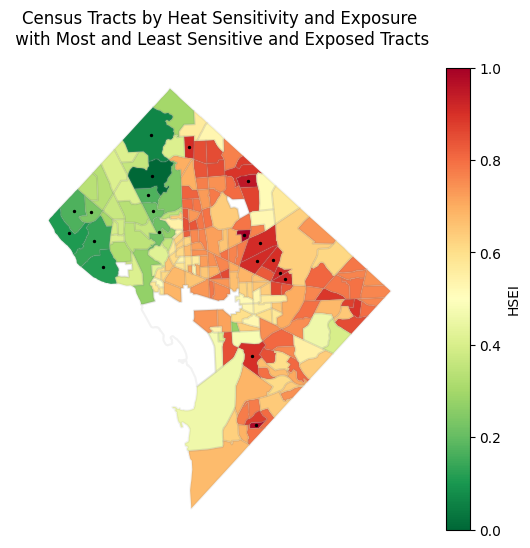

In [19]:
## map all

# Get top 10 and bottom 10 HSI tracts
top_10_HSEI_tracts = sorted_filtered_HSEI_HEAT.iloc[:10, :]
bottom_10_HSEI_tracts = sorted_filtered_HSEI_HEAT.iloc[-10:, :]

# combine to map
focused_HSEI_tracts = pd.concat([top_10_HSEI_tracts,bottom_10_HSEI_tracts])

# reposition crs
focused_HSEI_tracts = focused_HSEI_tracts.to_crs(epsg=26917)

#plot the results of HSI per census tract
fig, ax = plt.subplots(figsize=(10, 6))
filtered_HEAT.plot(column='HSEI', ax=ax, cmap='RdYlGn_r')
focused_HSEI_tracts.centroid.plot(ax=ax, marker='o', markersize=2, color='black')
heat.boundary.plot(ax=ax, color="grey", alpha=0.1, label="TRACT")

# Create a colorbar, specifying the axes
sm = ScalarMappable(cmap='RdYlGn_r')
sm.set_array([])
plt.colorbar(sm, label='HSEI', orientation='vertical', ax=ax)

plt.title('Census Tracts by Heat Sensitivity and Exposure\n with Most and Least Sensitive and Exposed Tracts')
ax.axis('off')
plt.show()